In [21]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [10]:
import os
os.listdir()

['.ipynb_checkpoints',
 'K-Mean Clustrning.ipynb',
 'Online Retail.xlsx',
 'OnlineRetail_Final_Preprocessed.xlsx',
 'part2.ipynb']

In [5]:
data=pd.read_excel('Online Retail.xlsx')

In [6]:
data.head(2)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [13]:
# Check for missing values
data_scaled.isnull().sum()


Quantity           0
UnitPrice          0
CustomerID    135080
dtype: int64

In [14]:
# Fill NaN with column mean
data_scaled = data_scaled.fillna(data_scaled.mean())

# OR fill with 0 if that makes more sense for your data
# data_scaled = data_scaled.fillna(0)


In [15]:
data_scaled.isnull().sum().sum()  # should return 0


np.int64(0)

In [7]:
# --- Step 1: Select Numerical Columns Only ---
numeric_cols = data.select_dtypes(include=['int64', 'float64']).columns


In [8]:
# --- Step 2: Standardize Using StandardScaler ---
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data[numeric_cols])

In [9]:
# --- Step 3: Convert Back to DataFrame ---
data_scaled = pd.DataFrame(data_scaled, columns=numeric_cols)

In [11]:
from sklearn.cluster import KMeans

In [16]:
# Compute WCSS
wcss = []
K = range(1, 11)

for k in K:
    kmeans = KMeans(n_clusters=k, init='k-means++', random_state=42)
    kmeans.fit(data_scaled)
    wcss.append(kmeans.inertia_)

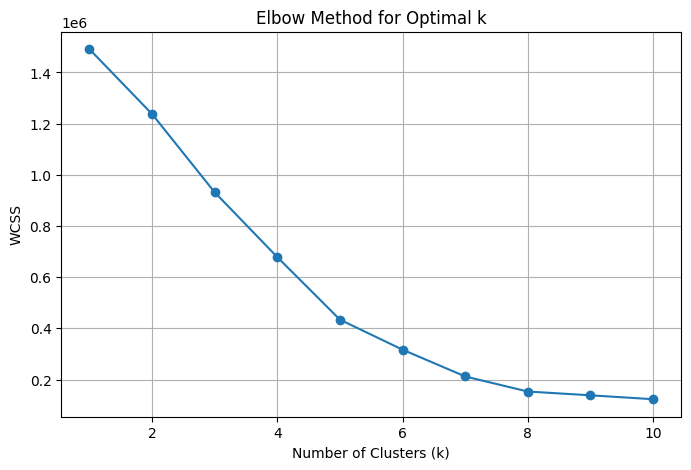

In [22]:
# Plot Elbow Curve
plt.figure(figsize=(8, 5))
plt.plot(K, wcss, marker='o')
plt.title('Elbow Method for Optimal k')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

In [24]:
optimal_k = 4

In [25]:
kmeans = KMeans(n_clusters=optimal_k, init='k-means++', random_state=42)
kmeans.fit(data_scaled)

# --- Step 4: Predict cluster labels ---
cluster_labels = kmeans.predict(data_scaled)


In [26]:
cluster_labels = kmeans.predict(data_scaled)

In [27]:
#Add cluster labels to the dataset ---
data_scaled['Cluster'] = cluster_labels

## Visualize Clusters

In [28]:
from sklearn.decomposition import PCA

In [29]:
# Separate features and labels
X = data_scaled.drop('Cluster', axis=1)
y = data_scaled['Cluster']

In [30]:
 #Reduce dimensions for visualization using PCA ---
pca = PCA(n_components=2)
pca_result = pca.fit_transform(X)

In [31]:
data_scaled['PCA1'] = pca_result[:, 0]
data_scaled['PCA2'] = pca_result[:, 1]

C:\Users\RAVINDRA MANDAL\AppData\Local\Programs\Python\Python313\Lib\site-packages\IPython\core\pylabtools.py:170: UserWarning: Creating legend with loc="best" can be slow with large amounts of data.
  fig.canvas.print_figure(bytes_io, **kw)


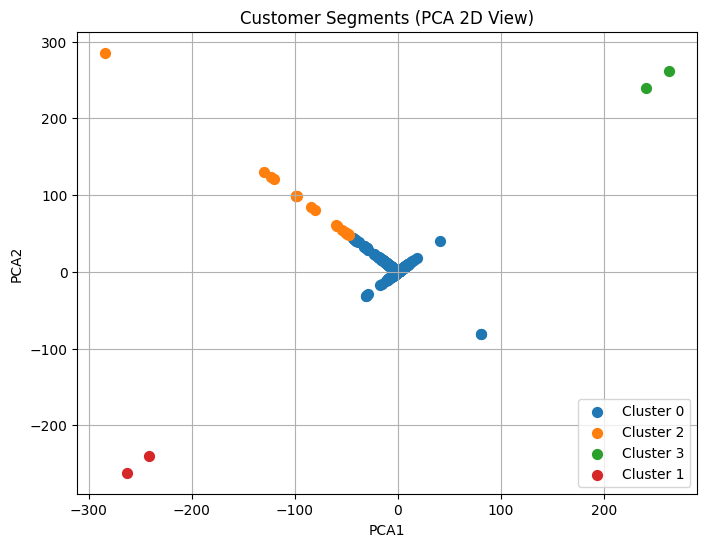

In [33]:
# --- Plot clusters ---
plt.figure(figsize=(8, 6))
for cluster in data_scaled['Cluster'].unique():
    plt.scatter(data_scaled[data_scaled['Cluster'] == cluster]['PCA1'],
                data_scaled[data_scaled['Cluster'] == cluster]['PCA2'],
                label=f'Cluster {cluster}', s=50)
plt.title('Customer Segments (PCA 2D View)')
plt.xlabel('PCA1')
plt.ylabel('PCA2')
plt.legend()
plt.grid(True)
plt.show()


In [34]:
#PCA compresses high-dimensional data into 2D while preserving variance.

### Assign Cluster Labels to the Original Data

In [35]:
#Add cluster labels
data['Cluster'] = data_scaled['Cluster']

### Analyze Each Segment

In [37]:
# Only use numeric columns for aggregation
numeric_cols = data.select_dtypes(include=['number']).columns

In [38]:
# Group by 'Cluster' and calculate stats only for numeric columns
summary = data.groupby('Cluster')[numeric_cols].agg(['mean', 'median', 'std'])

In [39]:
# Display summary
print(summary.head())

             Quantity                           UnitPrice           \
                 mean   median          std          mean   median   
Cluster                                                              
0            9.552698      3.0    54.958053      4.169478     2.08   
1       -77605.000000 -77605.0  4794.183976      1.560000     1.56   
2           -0.700000     -1.0     0.732695  11971.005500  9674.14   
3        77605.000000  77605.0  4794.183976      1.560000     1.56   

                        CustomerID                       Cluster              
                 std          mean   median          std    mean median  std  
Cluster                                                                       
0          46.354176  15287.694337  15152.0  1713.601606     0.0    0.0  0.0  
1           0.735391  14396.000000  14396.0  2899.137803     1.0    1.0  0.0  
2        7417.078263  15796.250000  16029.0   465.500000     2.0    2.0  0.0  
3           0.735391  14396.000000 

In [41]:
summary = data.groupby('Cluster')[['Quantity', 'UnitPrice', 'CustomerID']].agg(['mean', 'median', 'std'])


In [42]:
print(summary)

             Quantity                           UnitPrice           \
                 mean   median          std          mean   median   
Cluster                                                              
0            9.552698      3.0    54.958053      4.169478     2.08   
1       -77605.000000 -77605.0  4794.183976      1.560000     1.56   
2           -0.700000     -1.0     0.732695  11971.005500  9674.14   
3        77605.000000  77605.0  4794.183976      1.560000     1.56   

                        CustomerID                        
                 std          mean   median          std  
Cluster                                                   
0          46.354176  15287.694337  15152.0  1713.601606  
1           0.735391  14396.000000  14396.0  2899.137803  
2        7417.078263  15796.250000  16029.0   465.500000  
3           0.735391  14396.000000  14396.0  2899.137803  


In [43]:
summary.head(5)

Quantity                           UnitPrice           \
                 mean   median          std          mean   median   
Cluster                                                              
0            9.552698      3.0    54.958053      4.169478     2.08   
1       -77605.000000 -77605.0  4794.183976      1.560000     1.56   
2           -0.700000     -1.0     0.732695  11971.005500  9674.14   
3        77605.000000  77605.0  4794.183976      1.560000     1.56   

                        CustomerID                        
                 std          mean   median          std  
Cluster                                                   
0          46.354176  15287.694337  15152.0  1713.601606  
1           0.735391  14396.000000  14396.0  2899.137803  
2        7417.078263  15796.250000  16029.0   465.500000  
3           0.735391  14396.000000  14396.0  2899.137803

### This segmentation provides a data-driven understanding of the customer base, enabling targeted and personalized strategies.